<a href="https://colab.research.google.com/github/ireneesu/Austin-Housing-Market-Analysis/blob/main/final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/austinHousingData.csv')

In [ ]:
df

<ipython-input-73-fb050a9c9b2a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df.corr()


<Axes: >

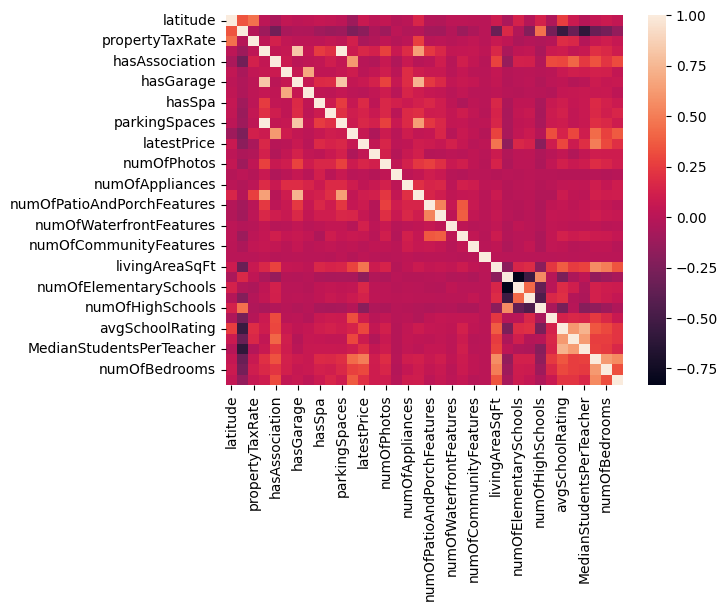

In [ ]:
cormat = df.corr()
round(cormat,2)
sns.heatmap(cormat)

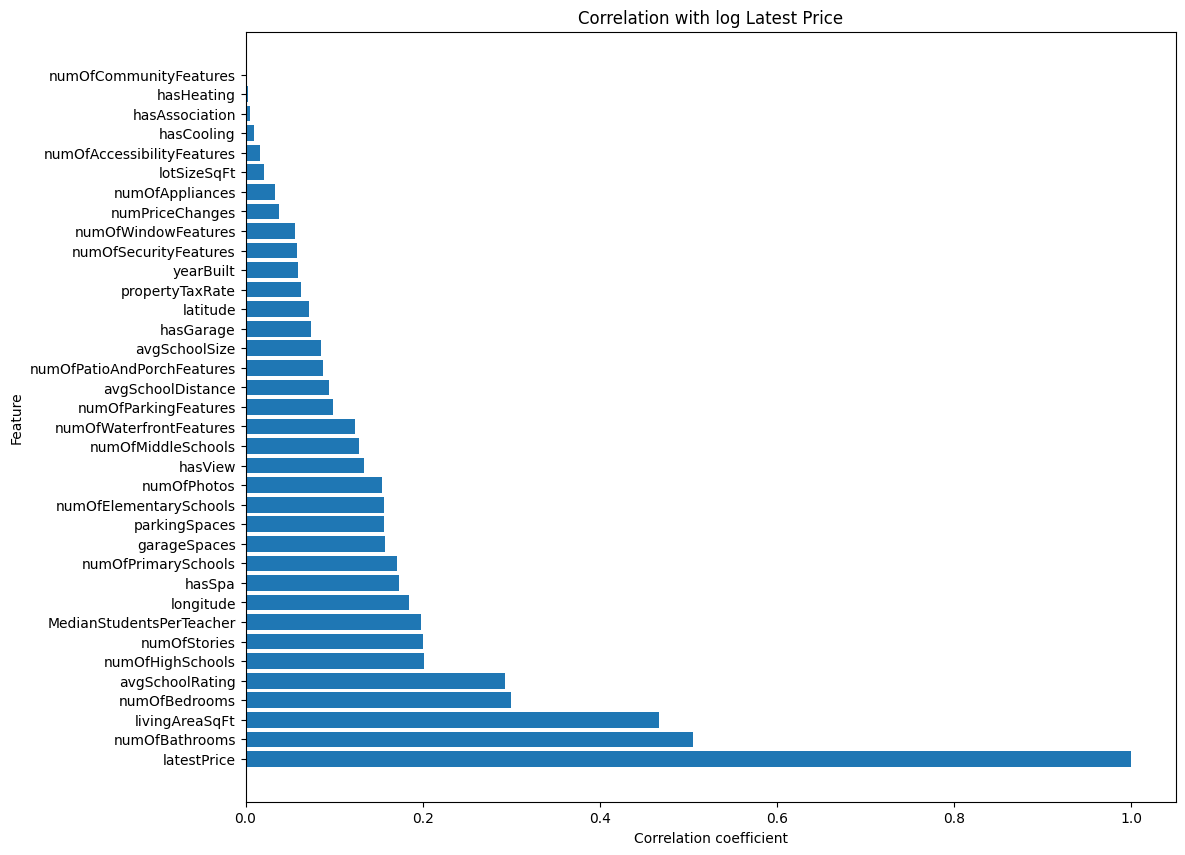

In [ ]:
plt.figure(figsize=(12, 10))
corr_latestPrice = abs(cormat["latestPrice"]).sort_values(ascending=False)
plt.barh(corr_latestPrice.index, corr_latestPrice)
plt.title("Correlation with log Latest Price")
plt.xlabel("Correlation coefficient")
plt.ylabel("Feature")
plt.show()

In [ ]:
plt.hist(df['latestPrice'], bins=300)#right skewed

Geographical Visualization

Interpretation:

Amenity Visualization

Data Cleaning

In [ ]:
df

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15167,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,True,...,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15168,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,False,...,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg
15169,29392029,austin,2000 Chestnut Ave,78722,So many options at this address in the eclecti...,30.281569,-97.717789,1.98,0,False,...,1,1,1.300000,6.666667,1057,15,2.0,4,1,29392029_a9a8306ea363d23f37d91d37975a1b96-p_f.jpg


Drop the irrelevant features

In [ ]:
df=df.drop(columns=['zpid','streetAddress','description','latest_saleyear','latest_salemonth','homeImage','latestPriceSource','latest_saledate','city','zipcode'])

In [ ]:
print(df.dtypes)

latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowFeatures             int64
numOfCommunityFeatures          int64
lotSizeSqFt                   float64
livingAreaSqFt                float64
numOfPrimary

In [ ]:
df['hasAssociation'] = df['hasAssociation'].astype(int)
df['hasCooling'] = df['hasCooling'].astype(int)
df['hasGarage'] = df['hasGarage'].astype(int)
df['hasHeating'] = df['hasHeating'].astype(int)
df['hasSpa'] = df['hasSpa'].astype(int)
df['hasView'] = df['hasView'].astype(int)

column_name = 'homeType'
dummy_variables = pd.get_dummies(df[column_name], prefix=column_name)

# Add the dummy variables to the original dataset
df_facotor = pd.concat([df, dummy_variables], axis=1)

# Remove the original column that was used to create the dummy variables
df_facotor = df_facotor.drop(column_name, axis=1)

Remove outliers

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis

mean = np.mean(df_facotor, axis=0)
covariance = np.cov(df_facotor,rowvar=False)

# Calculate the Mahalanobis distance of each data point
mahalanobis_dist = []
for i in range(len(df_facotor)):
    x = df_facotor.iloc[i,:]
    md = np.sqrt((x-mean).dot(np.linalg.inv(covariance)).dot((x-mean).T))
    mahalanobis_dist.append(md)

# Calculate the threshold value based on the chi-squared distribution
df_num = df_facotor.shape[1] # number of variables
alpha = 0.05 # significance level
threshold = np.mean(mahalanobis_dist) + 3*np.std(mahalanobis_dist)

# Identify outliers based on the threshold value
outliers = np.where(np.array(mahalanobis_dist) > threshold)[0]
outliers

array([   21,    23,    43,   176,   206,   248,   273,   290,   304,
         311,   394,   503,   523,   561,   588,   705,   709,   854,
         926,   964,  1007,  1023,  1034,  1051,  1067,  1122,  1141,
        1180,  1288,  1297,  1298,  1299,  1319,  1399,  1412,  1417,
        1453,  1472,  1486,  1522,  1534,  1557,  1897,  1962,  2002,
        2057,  2085,  2179,  2289,  2316,  2394,  2439,  2475,  2557,
        2838,  2860,  3207,  3335,  3395,  3438,  3470,  3496,  3509,
        3559,  3749,  3769,  3937,  3955,  4012,  4107,  4108,  4139,
        4311,  4351,  4533,  4576,  4743,  4906,  5150,  5167,  5223,
        5288,  5332,  5341,  5367,  5464,  5466,  5815,  5975,  6057,
        6287,  6294,  6635,  6722,  6885,  6906,  6977,  7040,  7279,
        7435,  7594,  7650,  7958,  8021,  8180,  8191,  8216,  8219,
        8253,  8557,  8597,  8633,  8737,  8797,  8805,  9175,  9182,
        9240,  9261,  9269,  9290,  9300,  9306,  9366,  9396,  9427,
        9531,  9651,

In [ ]:
df_no_out = df_facotor.drop(outliers)
df_no_out

,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,...,homeType_Apartment,homeType_Condo,homeType_Mobile / Manufactured,homeType_MultiFamily,homeType_Multiple Occupancy,homeType_Other,homeType_Residential,homeType_Single Family,homeType_Townhouse,homeType_Vacant Land
0,30.430632,-97.663078,1.98,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,30.432673,-97.661697,1.98,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,30.409748,-97.639771,1.98,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,30.432112,-97.661659,1.98,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,30.437368,-97.656860,1.98,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15165,30.185915,-97.828415,1.98,2,0,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
15166,30.161997,-97.816345,1.98,6,0,1,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
15167,30.240223,-97.772835,1.98,2,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
15168,30.244835,-97.761124,1.98,2,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


(array([ 12.,   1.,  10.,  16.,  34.,  67., 102., 163., 352., 345., 533.,
        730., 622., 758., 961., 857., 585., 901., 766., 696., 697., 453.,
        547., 255., 354., 335., 366., 317., 240., 251., 195., 121., 188.,
        144., 166.,  99., 164.,  80.,  68.,  82.,  70.,  94.,  46.,  50.,
         61.,  91.,   5.,   9.,  31.,  22.,  55.,  12.,  47.,   7.,  33.,
         35.,  11.,  54.,  12.,  47.,   9.,   4.,  26.,  18.,  30.,   6.,
         25.,  12.,  21.,  19.,   5.,  17.,   4.,  26.,   0.,   8.,   4.,
          7.,  19.,   5.,   8.,   5.,  20.,   0.,   4.,   5.,   1.,  15.,
          4.,   7.,   2.,  11.,  10.,   0.,   2.,   1.,   8.,   1.,   0.,
          7.,   2.,  10.,   1.,   2.,   0.,   3.,   0.,   0.,   2.,   1.,
          5.,   0.,   1.,   0.,   4.,  12.,   0.,   1.,   1.,  10.,   0.,
          0.,   5.,   2.,   6.,   0.,   9.,   1.,   3.,   1.,   0.,   1.,
          0.,   1.,   1.,   0.,   4.,   0.,   6.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   2.,   4., 

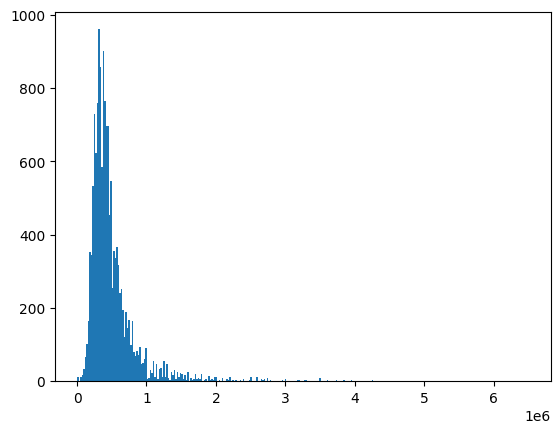

In [ ]:
plt.hist(df_no_out['latestPrice'], bins=300)

Log transform response variable

In [ ]:
df_no_out['lg_latestPrice'] = np.log(df_no_out['latestPrice'])
df_no_out.drop('latestPrice', axis=1, inplace=True)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
df_final=df_no_out
df_final.head()

,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,...,homeType_Condo,homeType_Mobile / Manufactured,homeType_MultiFamily,homeType_Multiple Occupancy,homeType_Other,homeType_Residential,homeType_Single Family,homeType_Townhouse,homeType_Vacant Land,lg_latestPrice
0,30.430632,-97.663078,1.98,2,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,12.628067
1,30.432673,-97.661697,1.98,2,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,12.594731
2,30.409748,-97.639771,1.98,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,12.453421
3,30.432112,-97.661659,1.98,2,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,12.388394
4,30.437368,-97.656860,1.98,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,12.387977


Feature transformation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
df_plot=df_final.drop(columns=['lg_latestPrice','hasAssociation','hasHeating','hasGarage','hasCooling','hasSpa','hasView','homeType_Apartment','homeType_Condo','homeType_Mobile / Manufactured','homeType_MultiFamily','homeType_Multiple Occupancy','homeType_Other','homeType_Residential','homeType_Single Family','homeType_Townhouse','homeType_Vacant Land'],axis=1)#focus on continuous
df_plot.head()
skewness = df_plot.skew()


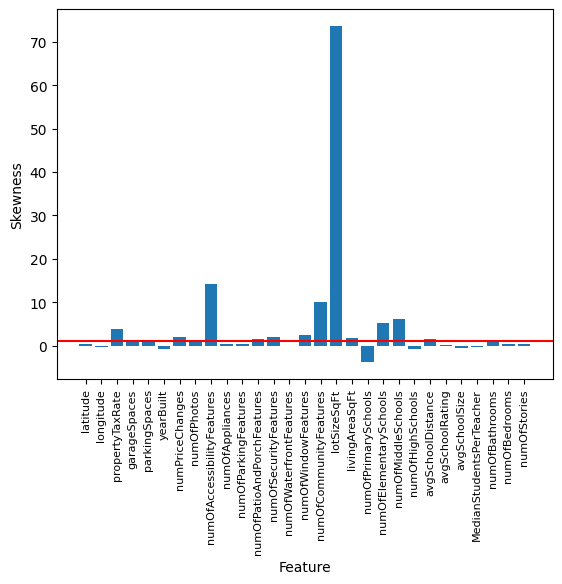

In [ ]:
plt.bar(x=skewness.index, height=skewness.values)
plt.xticks(rotation=90)
plt.xticks(range(len(skewness.index)), skewness.index, fontsize=8)
plt.xlabel("Feature")
plt.ylabel("Skewness")
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

In [ ]:
print(skewness)

latitude                       0.295735
longitude                     -0.315589
propertyTaxRate                3.775681
garageSpaces                   1.160056
parkingSpaces                  1.160056
yearBuilt                     -0.686536
numPriceChanges                1.970982
numOfPhotos                    1.240202
numOfAccessibilityFeatures    14.279291
numOfAppliances                0.378540
numOfParkingFeatures           0.339149
numOfPatioAndPorchFeatures     1.482014
numOfSecurityFeatures          1.947328
numOfWaterfrontFeatures        0.000000
numOfWindowFeatures            2.475056
numOfCommunityFeatures        10.113420
lotSizeSqFt                   73.637751
livingAreaSqFt                 1.878836
numOfPrimarySchools           -3.755949
numOfElementarySchools         5.175161
numOfMiddleSchools             6.244418
numOfHighSchools              -0.658729
avgSchoolDistance              1.560923
avgSchoolRating                0.087745
avgSchoolSize                 -0.432944


In [ ]:
skewed_cols = skewness[skewness > 1].index
skewed_cols
df_final[skewed_cols] = df_final[skewed_cols].apply(np.log1p)

In [ ]:
df_final

,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,...,homeType_Condo,homeType_Mobile / Manufactured,homeType_MultiFamily,homeType_Multiple Occupancy,homeType_Other,homeType_Residential,homeType_Single Family,homeType_Townhouse,homeType_Vacant Land,lg_latestPrice
0,30.430632,-97.663078,1.091923,1.098612,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,12.628067
1,30.432673,-97.661697,1.091923,1.098612,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,12.594731
2,30.409748,-97.639771,1.091923,0.000000,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,12.453421
3,30.432112,-97.661659,1.091923,1.098612,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,12.388394
4,30.437368,-97.656860,1.091923,0.000000,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,12.387977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15165,30.185915,-97.828415,1.091923,1.098612,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,12.542545
15166,30.161997,-97.816345,1.091923,1.945910,0,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,12.706848
15167,30.240223,-97.772835,1.091923,1.098612,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,13.217674
15168,30.244835,-97.761124,1.091923,1.098612,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,13.681979


In [ ]:
target = 'lg_latestPrice'
X = df_final.drop(target,axis=1)
y = df_final[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize Features

In [ ]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

Baseline Regression Model

In [ ]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Linear Regression
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
lr_score_train = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lr_score_test = mean_squared_error(y_test, lin_reg.predict(X_test_scaled), squared=False)

# Lasso Regression
lasso_reg = LassoCV().fit(X_train_scaled, y_train)
lasso_score_train = -1 * cross_val_score(lasso_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lasso_score_test = mean_squared_error(y_test, lasso_reg.predict(X_test_scaled), squared=False)


In [ ]:
print(lr_score_train)
print(lr_score_test)

0.34805383899649855
2526205303.2805758


In [ ]:
coef_mask = lasso_reg.coef_ != 0
selected_features = X.columns[coef_mask]
print('Selected features:', selected_features)
len(selected_features)

Selected features: Index(['latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasHeating', 'hasSpa', 'hasView',
       'parkingSpaces', 'yearBuilt', 'numPriceChanges', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories',
       'homeType_Condo', 'homeType_Multiple Occupancy',
       'homeType_Single Family', 'homeType_Vacant Land'],
      dtype='object')


35

Generate Principal Component

In [ ]:
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_train_scaled)

# View first 3 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:2,:]

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.028937,-0.030323,0.001978,-0.046686,0.334020,-0.380278,0.044470,0.432416,0.078658,0.113538,...,0.186289,-0.011297,-6.023883e-17,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
1,-0.252955,-0.150815,-0.020606,0.050652,0.187811,-0.245348,-0.236796,0.156499,0.013048,-0.070860,...,-0.169224,0.025565,-1.461610e-17,-1.241266e-16,8.099617e-18,-1.898435e-17,5.384691e-17,6.998351e-17,-2.118207e-17,1.006140e-16
2,0.070944,-0.012239,-0.080675,-0.030081,0.249326,-0.248282,0.033282,0.361211,-0.132174,0.296967,...,-0.033351,-0.028630,8.892875e-17,-5.379738e-17,4.123583e-17,4.797936e-17,-4.608817e-17,-2.587774e-17,-2.393622e-18,-7.068341e-17


In [ ]:
print(pca.explained_variance_ratio_)

[1.44805401e-01 9.54211984e-02 6.26404153e-02 5.75962378e-02
 4.87020050e-02 4.52727144e-02 4.46177682e-02 4.09859277e-02
 3.39312737e-02 2.96629676e-02 2.86849930e-02 2.76857343e-02
 2.65557889e-02 2.60027627e-02 2.43851708e-02 2.38259723e-02
 2.30104344e-02 2.23620603e-02 2.21191206e-02 2.07532034e-02
 1.96442973e-02 1.59846988e-02 1.48460206e-02 1.43144290e-02
 1.21139862e-02 1.04959740e-02 9.98089159e-03 9.02243359e-03
 8.08471267e-03 7.54975352e-03 7.32978859e-03 6.15558529e-03
 4.35579509e-03 3.79965164e-03 3.38484355e-03 2.40113106e-03
 1.51485765e-03 2.85578299e-32 4.79144740e-33 8.64875913e-34
 8.64875913e-34 8.64875913e-34 8.64875913e-34 8.64875913e-34
 4.19413881e-34]


Determine the Number of Principal Components

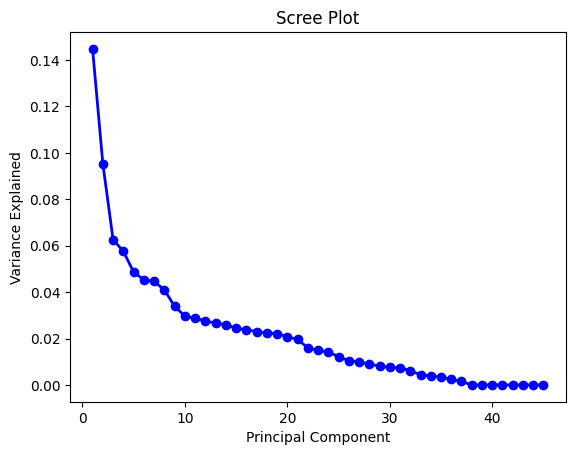

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

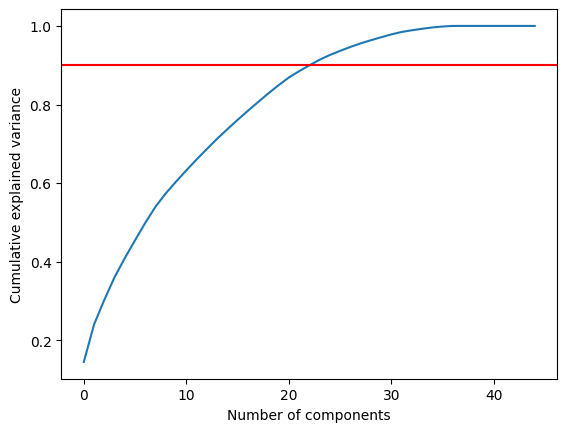

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find index of first value >= 0.9
n_components = np.argmax(cumulative_variance >= 0.9) + 1

print("Number of components to explain 90% of variance:", n_components)

Number of components to explain 90% of variance: 24


Run PCR with Best Number of Principal Components


In [ ]:
best_pc_num = 24

# Train model with first 9 principal components
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lin_reg_pc,
                                       X_train_pc[:,:best_pc_num],
                                       y_train,
                                       cv=cv,
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

# Get first 24 principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)

In [ ]:
results = pd.DataFrame({'Linear Regression': [lr_score_train, lr_score_test],
                        'LASSO': [lasso_score_train, lasso_score_test],
                        'PCR': [pcr_score_train, pcr_score_test]},
                       index=['Training RMSE', 'Testing RMSE'])
print(results)

               Linear Regression     LASSO       PCR
Training RMSE       3.480538e-01  0.348046  0.391565
Testing RMSE        2.526205e+09  0.359255  0.393299


In [ ]:
df_inverted = results.transpose()
df_inverted

,Training RMSE,Testing RMSE
Linear Regression,0.348054,2.526205e+09
LASSO,0.348046,3.592548e-01
PCR,0.391565,3.932994e-01


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

Decision Tree Default

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
# Create a decision tree regressor with default settings
Dtree = DecisionTreeRegressor()

# Train the decision tree model
Dtree.fit(X_train, y_train)

y_train_pred_tree = Dtree.predict(X_train)
y_test_pred_tree = Dtree.predict(X_test)

mse_train_tree = mean_squared_error(y_train, y_train_pred_tree)
mse_test_tree = mean_squared_error(y_test, y_test_pred_tree)

rmse_train_tree = np.sqrt(mse_train_tree)
rmse_test_tree = np.sqrt(mse_test_tree)

print('Decision Tree with Default:')
print('Training RMSE:', rmse_train_tree)
print('Testing RMSE:', rmse_test_tree)

Decision Tree with Default:
Training RMSE: 2.8138302010506456e-17
Testing RMSE: 0.41376683585059515


Decision Tree Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
Dtree = DecisionTreeRegressor()

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(Dtree, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Train the model with different hyperparameter combinations and find the best combination
grid_search.fit(X_train, y_train)

# Get the best estimator (decision tree model with the best hyperparameters)
best_tree = grid_search.best_estimator_

y_train_pred_best_tree = best_tree.predict(X_train)
y_test_pred_best_tree = best_tree.predict(X_test)

mse_train_best_tree = mean_squared_error(y_train, y_train_pred_best_tree)
mse_test_best_tree = mean_squared_error(y_test, y_test_pred_best_tree)

rmse_train_best_tree = np.sqrt(mse_train_best_tree)
rmse_test_best_tree = np.sqrt(mse_test_best_tree)

print('Best Decision Tree:')
print('Training RMSE:', rmse_train_best_tree)
print('Testing RMSE:', rmse_test_best_tree)
print('Best hyperparameters:', grid_search.best_params_)

Best Decision Tree:
Training RMSE: 0.24093937236705548
Testing RMSE: 0.33983684891606
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


### Bagging Default

In [ ]:
# Create a bagging regressor with default settings
bagging = BaggingRegressor(random_state=42)

# Train the bagging regressor model
bagging.fit(X_train, y_train)

# Make predictions using the bagging regressor model
y_train_pred_bagging = bagging.predict(X_train)
y_test_pred_bagging = bagging.predict(X_test)

mse_train_bagging = mean_squared_error(y_train, y_train_pred_bagging)
mse_test_bagging = mean_squared_error(y_test, y_test_pred_bagging)

rmse_train_bagging = np.sqrt(mse_train_bagging)
rmse_test_bagging = np.sqrt(mse_test_bagging)

# Calculate the mean squared error for the bagging regressor model
print('Bagging Regressor:')
print('Training RMSE:', rmse_train_bagging)
print('Testing RMSE:', rmse_test_bagging)

Bagging Regressor:
Training RMSE: 0.11758395851154299
Testing RMSE: 0.29825062179390965


Bagging H-T

In [ ]:
# Create a bagging regressor with default settings
bagging = BaggingRegressor(estimator=Dtree,
                           bootstrap=True,
                           n_jobs=-1,
                           random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

# Create the GridSearchCV object with the BaggingRegressor and the parameter grid
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Train the GridSearchCV object to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the bagging regressor model using the best hyperparameters
best_bagging = grid_search.best_estimator_
best_bagging.fit(X_train, y_train)

# Make predictions using the bagging regressor model with the best hyperparameters
y_train_pred_best_bagging = best_bagging.predict(X_train)
y_test_pred_best_bagging = best_bagging.predict(X_test)

mse_train_best_bagging = mean_squared_error(y_train, y_train_pred_best_bagging)
mse_test_best_bagging = mean_squared_error(y_test, y_test_pred_best_bagging)

rmse_train_best_bagging = np.sqrt(mse_train_best_bagging)
rmse_test_best_bagging = np.sqrt(mse_test_best_bagging)

# Calculate the mean squared error for the bagging regressor model with the best hyperparameters
print('Best Bagging Regressor:')
print('Training RMSE:', rmse_train_best_bagging)
print('Testing RMSE:', rmse_test_best_bagging)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters: {'max_samples': 0.8, 'n_estimators': 500}
Best Bagging Regressor:
Training RMSE: 0.11953393976308911
Testing RMSE: 0.27922756087868883


Pasting H-T

In [ ]:
# Create a pasting regressor with default settings
pasting = BaggingRegressor(estimator=Dtree,
                           bootstrap=False,
                           n_jobs=-1,
                           random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

# Create the GridSearchCV object with the BaggingRegressor and the parameter grid
grid_search = GridSearchCV(estimator=pasting, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Train the GridSearchCV object to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the bagging regressor model using the best hyperparameters
best_pasting = grid_search.best_estimator_
best_pasting.fit(X_train, y_train)

# Make predictions using the bagging regressor model with the best hyperparameters
y_train_pred_best_pasting = best_pasting.predict(X_train)
y_test_pred_best_pasting = best_pasting.predict(X_test)

mse_train_best_pasting = mean_squared_error(y_train, y_train_pred_best_pasting)
mse_test_best_pasting = mean_squared_error(y_test, y_test_pred_best_pasting)

rmse_train_best_pasting = np.sqrt(mse_train_best_pasting)
rmse_test_best_pasting = np.sqrt(mse_test_best_pasting)

# Calculate the mean squared error for the bagging regressor model with the best hyperparameters
print('Best Pasting Regressor:')
print('Training RMSE:', rmse_train_best_pasting)
print('Testing RMSE:', rmse_test_best_pasting)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters: {'max_samples': 0.5, 'n_estimators': 500}
Best Pasting Regressor:
Training RMSE: 0.13418476367088694
Testing RMSE: 0.2796799075511633


Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoost regressor with the decision tree regressor as the base estimator
ada_boost = AdaBoostRegressor(base_estimator=Dtree, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Create the GridSearchCV object with the AdaBoostRegressor and the parameter grid
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Train the GridSearchCV object to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the AdaBoost regressor model using the best hyperparameters
best_ada_boost = grid_search.best_estimator_
best_ada_boost.fit(X_train, y_train)

# Make predictions using the AdaBoost regressor model with the best hyperparameters
y_train_pred_best_ada_boost = best_ada_boost.predict(X_train)
y_test_pred_best_ada_boost = best_ada_boost.predict(X_test)

mse_train_best_ada_boost = mean_squared_error(y_train, y_train_pred_best_ada_boost)
mse_test_best_ada_boost = mean_squared_error(y_test, y_test_pred_best_ada_boost)

rmse_train_best_ada_boost = np.sqrt(mse_train_best_ada_boost)
rmse_test_best_ada_boost = np.sqrt(mse_test_best_ada_boost)

# Calculate the root mean squared error for the AdaBoost regressor model with the best hyperparameters
print('Best AdaBoost Regressor:')
print('Training RMSE:', rmse_train_best_ada_boost)
print('Testing RMSE:', rmse_test_best_ada_boost)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best hyperparameters: {'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 500}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best AdaBoost Regressor:
Training RMSE: 0.009120194489426976
Testing RMSE: 0.2760235857001746


Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [1, 2, 3, 4, 5],
}

# Create the GridSearchCV object with the GradientBoostingRegressor and the parameter grid
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Train the GridSearchCV object to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the Gradient Boosting regressor model using the best hyperparameters
best_gbr = grid_search.best_estimator_
best_gbr.fit(X_train, y_train)

# Make predictions using the Gradient Boosting regressor model with the best hyperparameters
y_train_pred_best_gbr = best_gbr.predict(X_train)
y_test_pred_best_gbr = best_gbr.predict(X_test)

mse_train_best_gbr = mean_squared_error(y_train, y_train_pred_best_gbr)
mse_test_best_gbr = mean_squared_error(y_test, y_test_pred_best_gbr)

rmse_train_best_gbr = np.sqrt(mse_train_best_gbr)
rmse_test_best_gbr = np.sqrt(mse_test_best_gbr)

# Calculate the root mean squared error for the Gradient Boosting regressor model with the best hyperparameters
print('Best Gradient Boosting Regressor:')
print('Training RMSE:', rmse_train_best_gbr)
print('Testing RMSE:', rmse_test_best_gbr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Best Gradient Boosting Regressor:
Training RMSE: 0.1259443594140697
Testing RMSE: 0.27093686996427596


In [ ]:
feature_importances = best_gbr.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Features': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print('Feature Importances:')
print(feature_importance_df)

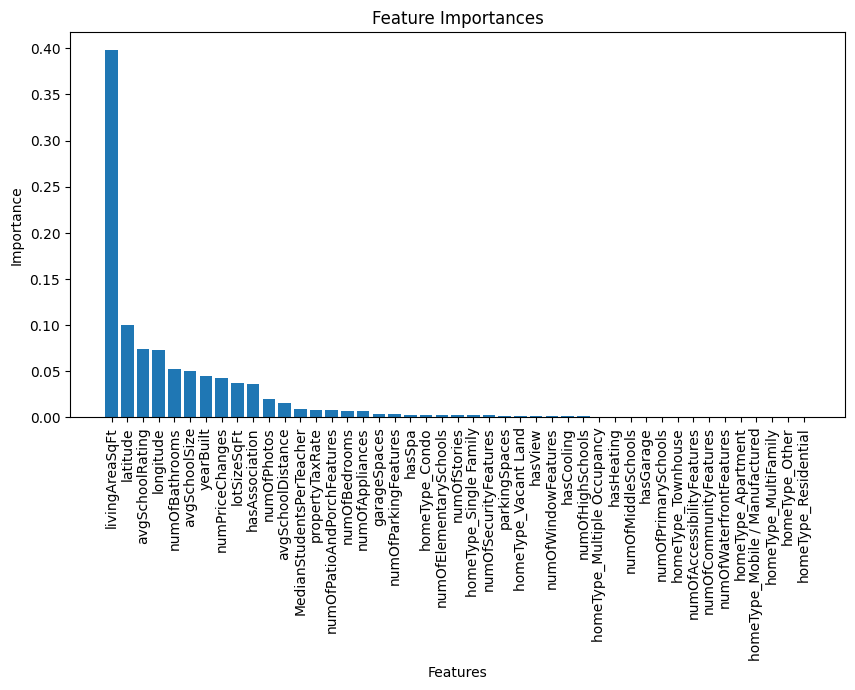

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(feature_importance_df['Features'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
model_results = {
    'Model': ['Decision Tree Default', 'Decision Tree Tuned',  'Bagging Tuned', 'Pasting Tuned', 'Adaboost', 'Gradient Boost'],
    'Training RMSE': [2.8138302010506456e-17, 0.2409, 0.1195, 0.13418, 0.00912, 0.1259],
    'Testing RMSE': [0.413, 0.3398, 0.2792, 0.27967, 0.276, 0.2709]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(model_results)

# Display the DataFrame
results_df
def format_number(num):
    return "{:.3f}".format(num)

# apply the formatting function to the column
results_df['Training RMSE'] = results_df['Training RMSE'].apply(format_number)
results_df

,Model,Training RMSE,Testing RMSE
0,Decision Tree Default,0.000,0.41300
1,Decision Tree Tuned,0.241,0.33980
2,Bagging Tuned,0.119,0.27920
3,Pasting Tuned,0.134,0.27967
4,Adaboost,0.009,0.27600
5,Gradient Boost,0.126,0.27090
